In [ ]:
# Math Section for Skuld model v2
import math
import numpy as np

a = 1 # the main part of what i will be changing for weights changes the size of the sigmoid without changing near zero
b = 0  # bias will add to updating with ^ later
m = 5 # the rate of change of the sigmoid 
c = 3 # a constant I used, same as but but shift the sigmod to a place where i 0 is close to 0 (actuyll 0.04 but whatever)
layer_bias = 0.5


def ians_sigmoid(x, a, b, m, c, layer=0):
    return 1/ ((1/a) + np.exp(((-x*m) + b + c + layer * layer_bias)))
#print(ians_sigmoid(0.8, a, b, m, c))

def calc_loss(output, desired):
    # can change but not a requirement yet
    return (0.5 * ((output - desired) ** 2))


def d_loss_d_weight_2(n1, n2, desired):
    # check the removal of the layer bias fo rthis one and go back to check the others as well
    return ((n2 - desired) * (n2) * (1-(n2)) * n1) # removedall layer_bias can check layer if correct call

def d_loss_d_weight_1(n1, n2, desired, w2, input):
    # check the removal of the layer bias fo rthis one and go back to check the others as well
    return ((n2 - desired) * (n2) * (1-(n2)) * n1 * w2 * (1- n1) * input)


def d_loss_d_bias_2(n2, desired):
    return (n2 - desired) * (n2 - layer_bias) * (1 - (n2 - layer_bias))

def d_loss_d_bias_1(n1, n2, delta2, desired, a2):
    #delta2 = (n2 - desired) * (n2 - layer_bias) * (1 - (n2 - layer_bias))
    return delta2 * a2 * (n1 - layer_bias) * (1 - (n1 - layer_bias))


def update_param(lr, grad, w):
    w -= lr * grad
    return w




def forward_pass(input, a1, a2, b1, b2):
    sig_r1 = ians_sigmoid(input, a1, b1, m, c)
    delay_1 = sig_r1 + input
    sig_r2 = ians_sigmoid(delay_1, a2, b2, m, c, layer=1)
    delay_2 = sig_r2 + delay_1

    return ([delay_1, delay_2], [sig_r1, sig_r2])


def run_basic(input, a1, a2, b1, b2, desired, lr):   # will need to check work on bias/b and make sure everything is correct in this

    result = forward_pass(input, a1, a2, b1, b2)
    output = result[0][1]
    n1 = result[0][0]
    n2 = result[0][1]

    #loss = calc_loss(output, desired)

    delta_a2 = - d_loss_d_weight_2(n1, n2, desired)

    delta_a1 = - d_loss_d_weight_1(n1, n2, desired, a2, input) # trying to just input a as a the weight directly

    new_a1 = update_param(lr, delta_a1, a1)
    new_a2 = update_param(lr, delta_a2, a2)


    delta_b2 = - d_loss_d_bias_2(n2, desired)
    delta_b1 = - d_loss_d_bias_1(n1, n2, delta_b2, desired, b2) # trying to just input a as a the weight directly


    new_b1 = update_param(lr, delta_b1, b1)
    new_b2 = update_param(lr, delta_b2, b2)

    return new_a1, new_a2, new_b1, new_b2, result




In [91]:
class Neuron: 
    def __init__(self, layer, number):
        self.threshold = 10 # will be threshold and will be used to count inputs pretty mcuh. will turn into function later
        self.layer = layer
        self.number = number
    

        self.spikes = 0
        self.firetime = 10
        self.fired = False
        self.next_layer = 0
        self.input_syn = 0
        self.output_syn = 0
        self.set_outputs(layer)
        

    def set_outputs(self, layer):
        global input_layer, hidden_layer, output_layer, syn_layer_1, syn_layer_2
        if layer == 0:
            self.next_layer = hidden_layer
            #self.input_syn = 0 # remains nothing
            self.output_syn = syn_layer_1
        elif layer == 1:
            self.next_layer = output_layer
            self.input_syn = syn_layer_1
            self.output_syn = syn_layer_2
        elif layer == 2:
            self.next_layer = 0
            self.input_syn = syn_layer_2

    
    def set_firetime(self, time):
        self.firetime = time
        self.fired = True

    def fire(self):
        self.fired = True
        start = (self.number)*self.next_layer
        print("yet got here")
        for syn in self.output_syn[start:start+self.next_layer]:
            #print('input: ', syn.input_neuron, "output ", syn.output_neuron, "on layer ", syn.layer)
            syn.set_spiketime(self.firetime)
            print("spike time: ", syn.check_spike())
            pass
        # for all sync going out from this one: 
            # set call ian_sig and set that synapaces time to reach at calculated time


    # def check_firetime(self):
    #     if self.calculated == True:
    #         return self.firetime
    #     else:
    #         return


class synapse:
    def __init__(self, input_neuron, output_neuron, layer):
        self.input_neuron = input_neuron
        self.output_neuron = output_neuron
        self.layer = layer
        self.spike_time = 10

    def set_spiketime(self, time):
        self.spike_time = time

    def check_spike(self):
        return self.spike_time


In [92]:
import numpy as np
import math

input_layer = 2
hidden_layer = 5
output_layer = 1 
m = 5
c = 3
inputs = [0.5] * input_layer 
run_time = 10 
l1a = [1.0] * input_layer
l1b = [0.0] * input_layer

l2a = [1.0] * hidden_layer
l2b = [0.0] * hidden_layer

l3a = [1.0] * output_layer
l3b = [0.0] * output_layer

neurons_input = []
neurons_hidden = []
neurons_output = []

syn_layer_1 = []
syn_layer_2 = []

def create_new_neurons_network():
    count = 0
    for i, val in enumerate(inputs):
        n = Neuron(layer=0, number=i)  # will add later to add a and b and such
        n.set_firetime(val)
        neurons_input.append(n)
        #print('Neuron Input Layer neuron ' + str(neurons_input[i].number) + ' firing at :' + str(neurons_input[i].firetime))

    count = 0
    for i in range (hidden_layer):
        n = Neuron(layer=1, number=i)
        neurons_hidden.append(n)
        #print("Neuron at layer 1: " + str(neurons_hidden[i].number))

    count = 0
    for i in range (output_layer):
        n = Neuron(layer=2, number=i)
        neurons_output.append(n)
        #print("Neuron at output layer: " + str(neurons_output[i].number))


def create_synapses():
    for input_n in neurons_input:
        for hidden_n in neurons_hidden:
            #print(input_n.number)
            #print(hidden_n.number)
            # create new object of synapics 
            #give the object to both neurons so one can output to and the other can edit it
            syn = synapse(input_neuron=input_n.number, output_neuron=hidden_n.number, layer=0) 
            syn_layer_1.append(syn)

    for hidden_n in neurons_hidden:
        for output_n in neurons_output:
            #print("h", hidden_n.number)
            #print("0" , output_n.number)
            # create new object of synapics 
            #give the object to both neurons so one can output to and the other can edit it
            syn = synapse(input_neuron=hidden_n.number, output_neuron=output_n.number, layer=0) 
            syn_layer_2.append(syn)

    return 0


def run_simulation(inputs, runtime, dx):
    # create the assocated neurons for each layer with proper details
    create_new_neurons_network() # creates all the neurons right now 1-1-1 network
    #print("\n")
    create_synapses()

    # set the inputs to the first layer
    for i in range(len(neurons_input)):
        neurons_input[i].fire()

    # if i in range(len(neurons_hidden)):
    #     print(neurons_hidden[i].check())
        #print(neurons_input[i].firetime)


    return "---"
    

print(run_simulation(inputs, 10, 10))


yet got here
spike time:  0.5
spike time:  0.5
spike time:  0.5
spike time:  0.5
spike time:  0.5
yet got here
spike time:  0.5
spike time:  0.5
spike time:  0.5
spike time:  0.5
spike time:  0.5
---


In [58]:
a_list = []

for i in range(5):
    for j in range(10, 13):
        a_list.append([i, j])

print(a_list)

[[0, 10], [0, 11], [0, 12], [1, 10], [1, 11], [1, 12], [2, 10], [2, 11], [2, 12], [3, 10], [3, 11], [3, 12], [4, 10], [4, 11], [4, 12]]


In [222]:
# train

input = 0.5
lr = 1.3
a1 = 0.5
a2 = 2.5
b1 = 0
b2 = 0
desired = 1.5
# weird thing with moving the lr too much need to keep low nery steep start with changing lower m maybe?
for i in range(10):
    a1, a2, b1, b2, r = run_basic(input, a1, a2, b1, b2, desired, lr)
    print("a1 and a2: ", a1, a2)
    #print("b1 and b2: ", b1, b2)
    print(np.round(r[0][1], 3))





a1 and a2:  0.436536882181106 2.2752835659918036
1.691
a1 and a2:  0.4052599108097197 2.163596489302757
1.615
a1 and a2:  0.38862941829910197 2.103789094709322
1.569
a1 and a2:  0.37918364455493797 2.0696598046602377
1.543
a1 and a2:  0.37358046499156766 2.049353852917697
1.527
a1 and a2:  0.37016458164606647 2.0369512221193515
1.517
a1 and a2:  0.36804614816893894 2.0292502376179065
1.511
a1 and a2:  0.3667181059852291 2.0244188287959313
1.507
a1 and a2:  0.3658798610867362 2.0213678229054217
1.504
a1 and a2:  0.3653484765691714 2.0194331171881283
1.503


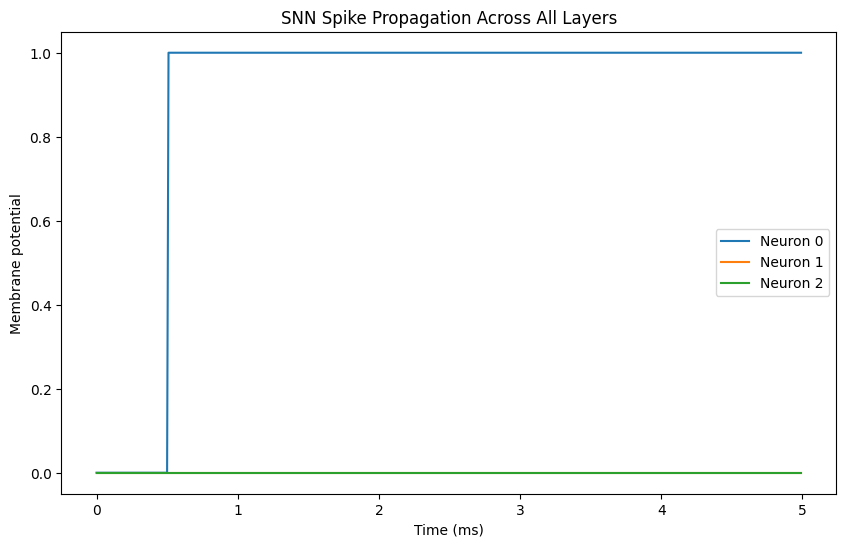

In [ ]:
# Brian Simulation: 
from brian2 import *
import numpy as np
import logging
import warnings
from brian2 import prefs, set_device
# Tell Brian2 to use the Cython code generator:
prefs.codegen.target = 'cython'

# Optionally compile but keep Python interface:
set_device('runtime')  # default; compiles operations to .so but stays in Python process

# suppress overflow warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
numpy.seterr(over='ignore', under='ignore')
logging.getLogger('brian2').setLevel(logging.ERROR)

# ----------------------------------------------------------------------------
# Spike timing and derivative

start_scope()
defaultclock.dt = 0.001*ms

@implementation('numpy', discard_units=True)
@check_units(id=1, time=1, layer=1, result=1)
def calc_delay(id, time, layer):
    # get specific neuron synapics id to get specific a b and voltages values
    return 0.5



# @implementation('numpy', discard_units=True)
# @check_units(w=1, global_clock=1, layer=1, sum=1, spikes_received=1, result=1)
# def d_spike_timing_dw(w, time):
#     x = (time % 1)
#     z = 5.0 * (x - 0.5)
#     sig = 1.0 / (1.0 + np.exp(-w * z))
#     return sig * (1.0 - sig) * z

# ----------------------------------------------------------------------------
# Forward pass: 4->10->3 using two-stage mini_urd


def mini1x1x1(inputs):
    """
    Mini 1x1x1 network with a single input, hidden, and output neuron.
    This is a minimal example to demonstrate the basic structure of a spiking neural network.
    """
    # Define network sizes
    n_input = 1
    n_hidden = 1
    n_output = 1
    n_total = n_input + n_hidden + n_output

    # Full neuron group
    neurons = NeuronGroup(n_total, '''
        v : 1
        sum : 1
        spikes_received : 1
        scheduled_time : second
        global_clock : 1
        spiked : boolean
    ''', threshold='v > 1', reset='''
    v = 0
    spiked = False
    ''', method='exact')

    neurons.v = 0
    neurons.scheduled_time = 1e9 * second
    neurons.global_clock = 0.0
    neurons.sum = 0.0
    neurons.spikes_received = 0.0

    # Spike inputs (one per input neuron)     
    stim = SpikeGeneratorGroup(n_input, indices=range(n_input), times=(inputs) * ms)

    # Input → Hidden connections
    syn_input = Synapses(stim, neurons[0:n_input], '''
        layer : 1
    ''', on_pre='''
        spikes_received += 1
        v += 1
    ''')
    syn_input.connect(j='i')  # connect stim[i] to neurons[i]
    syn_input.layer = 0
    #syn_input.w = -42  # just to skip and return t in function
    
    ''' scheduled_time = t + calc_delay(1, t, layer) * ms 
        if spikes_recived == 1:
            print("got here")'''

    # Hidden layer: input → hidden
    syn_hidden = Synapses(neurons[0:n_input], neurons[n_input:n_input + n_hidden], '''
        w : 1
        layer : 1
    ''', on_pre='''
        spikes_received += 1
        v += 1
    ''')
    syn_hidden.connect()
    #syn_hidden.w = w1 
    syn_hidden.layer = 1

    # Output layer: hidden → output
    syn_output = Synapses(neurons[n_input:n_input + n_hidden], neurons[n_input + n_hidden:n_total], '''
        w : 1
        layer : 1
    ''', on_pre='''
        spikes_received += 1
        v += 1
    
    ''')
    syn_output.connect()
    #syn_output.w = w2 
    syn_output.layer = 2

    neurons.run_regularly('''
        global_clock += 0.001
        
    ''', dt=0.001*ms)

        #v = int(abs(t - scheduled_time) < 0.005*ms) * 1.2

    # Monitors
    mon = StateMonitor(neurons, 'v', record=True, dt=0.01*ms)
    mon_sum = StateMonitor(neurons, 'sum', record=True)
    sp_mon = StateMonitor(neurons, 'spikes_received', record=True)
    sch_time = StateMonitor(neurons, 'scheduled_time', record=True)


    spikemon = SpikeMonitor(neurons)


    run(5*ms)

    # Plot voltages
    figure(figsize=(10, 6))
    for i in range(n_total):  # All neurons
        plot(mon.t/ms, mon.v[i], label=f'Neuron {i}')
    xlabel('Time (ms)')
    ylabel('Membrane potential')
    legend()
    title('SNN Spike Propagation Across All Layers')
    show()

    # plot(mon_sum.t/ms, mon_sum.sum[3])  # or any neuron index
    # print(mon_sum.sum[1])
    # print(sp_mon.spikes_received[1])
    # print(sch_time.scheduled_time[1])

    for i in range(n_total):
        times = spikemon.spike_trains()[i]
        if len(times) > 0:
            formatted_times = [f"{t/ms:.3f} ms" for t in times]
            print(f"Neuron {i} spike times: {formatted_times}")

input = [0.5]

mini1x1x1(input)
